In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Access Data

In [2]:
data_df=pd.read_csv(r"C:\Users\gagandeep.risam\Documents\Frame  strian prediction\insurance.csv")

In [3]:
data_df.head() # check data loading

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Data frame is loaded

In [4]:
data_df.shape # Check the shape of the data frame

(1338, 7)

* There are 7 atribues and 1338 records

LIST OF ATRRIBUTES WITH DATA TYPES : 
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Text(0.5, 1.0, 'Data Type Distribution Mapping')

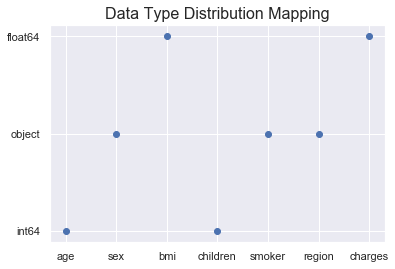

In [5]:
print ('LIST OF ATRRIBUTES WITH DATA TYPES : \n',data_df.dtypes) # list of attibutes and types
sns.set() # map the attributes graphically
barplot=plt.scatter(data_df.dtypes.index,data_df.dtypes.astype(str))
plt.title('Data Type Distribution Mapping',fontsize=16)

* There are 4 (2 float and 2 int) numeric and 3 object data type attributes

Text(0.5, 1.0, 'Count plot for Attributes')

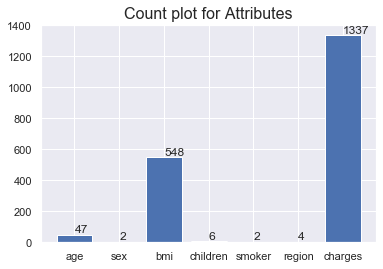

In [6]:
barplot=plt.bar(data_df.nunique().index,data_df.nunique().astype(int))
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,'%0.0f'%(yval), va='bottom')
plt.title('Count plot for Attributes',fontsize=16)

* No of children is a discrete numeric attribute (ordinal) and will be converted to numeric datatype
* All the discrete attributes shall be converted to category datatype (sex,children,smoker,region)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Text(0.5, 1.0, 'Dtype diistribution')

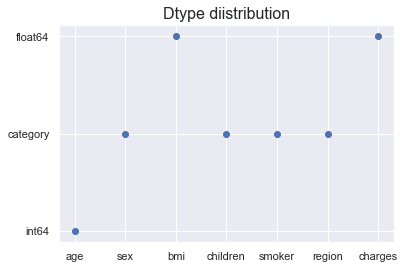

In [7]:
print(data_df.dtypes)
data_df['children']=data_df['children'].astype('category') # change data type to category
for i in data_df.columns :        # change object variable to category
    if data_df[i].dtypes=='object':
        data_df[i]=data_df[i].astype('category')
 # countplot for data type       
barplot=plt.scatter(data_df.dtypes.index,data_df.dtypes.astype(str))
plt.title('Dtype diistribution',fontsize=16)

* All the discrete attributes are converted to category datatype

## Missing Value Check

In [8]:
 data_df.isna().any() # check for missing values

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

* There are no missing values 

## Summary of Data Preperation 
* Records                       : 1338
* Attributes                    : 7 
    * Contineous Numeric        : 3 [Age,bmi,charge]
    * Discrete nominal category : 3 [Sex,Smoker,Region]
    * Discrete Ordinal category : 1 [Children]
* Missing values                : 0 

# Univariate Analysis

--------------------------5 point Summary-----------------------------

               min         25%       50%           75%          max
age        18.0000    27.00000    39.000     51.000000     64.00000
bmi        15.9600    26.29625    30.400     34.693750     53.13000
charges  1121.8739  4740.28715  9382.033  16639.912515  63770.42801


----Mean and Standard Deviation summary----

          count          mean           std
age      1338.0     39.207025     14.049960
bmi      1338.0     30.663397      6.098187
charges  1338.0  13270.422265  12110.011237


Text(0.5, 0.98, 'Box Plots (5 point summary) -Contineous Numeric Attributes')

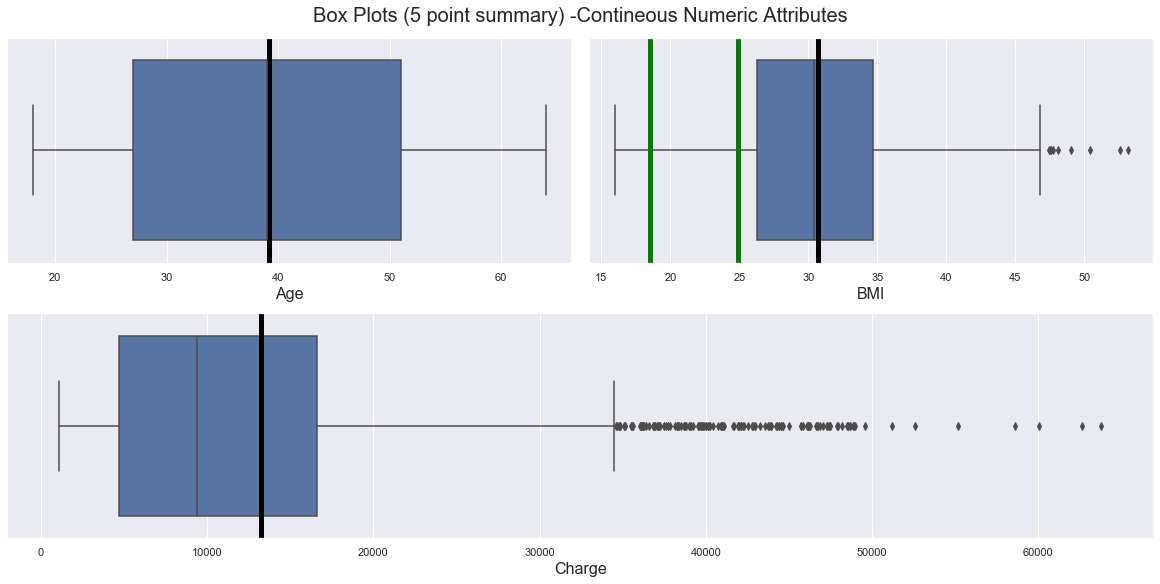

In [9]:
 # 5 point summary in nuerical form
print('--------------------------5 point Summary-----------------------------\n')
print(data_df.describe ().iloc[3:8,:].T )
# Box plot for numeric variables
print('\n\n----Mean and Standard Deviation summary----\n')
print(data_df.describe ().iloc[0:3,:].T )
sns.set()
fig =plt.figure(constrained_layout=True,figsize=(16,8)) 
gs = fig.add_gridspec(2, 2)
fig_ax1=fig.add_subplot(gs[0,0])
fig_ax2=fig.add_subplot(gs[0,1])
fig_ax3=fig.add_subplot(gs[1,:])
sns.boxplot(data_df['age'],ax=fig_ax1)
fig_ax1.set_xlabel('Age',fontsize=16)
sns.boxplot(data_df['bmi'],ax=fig_ax2)
fig_ax2.set_xlabel('BMI',fontsize=16)
sns.boxplot(data_df['charges'],ax=fig_ax3)
fig_ax3.set_xlabel('Charge',fontsize=16)
fig_ax1.axvline(x=data_df['age'].mean(),linewidth=5,color='black')
fig_ax2.axvline(x=data_df['bmi'].mean(),linewidth=5,color='black')
fig_ax2.axvline(x=18.5,linewidth=5,color='green')
fig_ax2.axvline(x=24.9,linewidth=5,color='green')
fig_ax3.axvline(x=data_df['charges'].mean(),linewidth=5,color='black')

fig.suptitle('Box Plots (5 point summary) -Contineous Numeric Attributes',fontsize=20)

# Inference based on 5 Point summary for Contineous Numeric Attributes
* Age : Mean and Median are almost identical and the 4 quartile ranges are almost of same size indicating Flat distribution.Age ofpeople covered under medical insurance range from 18 to 64 years and people across all ages are equally likely to take insurance (due to flat distribution observed)
* BMI : Mean and Median are almost identical. Data is more symetrically concentrated in 2nd and 3rd quartile. The data is also symetrically concenterated in 1 and 4th quartile(whiskers) but has a bigger range as compared to 2 and 3rd quartile indicating normal distribution.More than ~80 % of the people covered under insurance have bmi greater than the ideal value (18.5-24.9) indication overweight or poor health.(Range indicated by Green band). Few outlier are observed.
* Charges : Distribution is right tailed  as the mean is significant greater than median and the right wisher is relatively very long. (confirmed in box plot).50% of the insurance money is claimed by the ~30% of the people insured.There are significant number of outliers identified by range method (refer box plot)
* Note : Mean value is indicated by Black line

Text(0.5, 0.98, 'Distribution plots -Contineous Numeric Attributes')

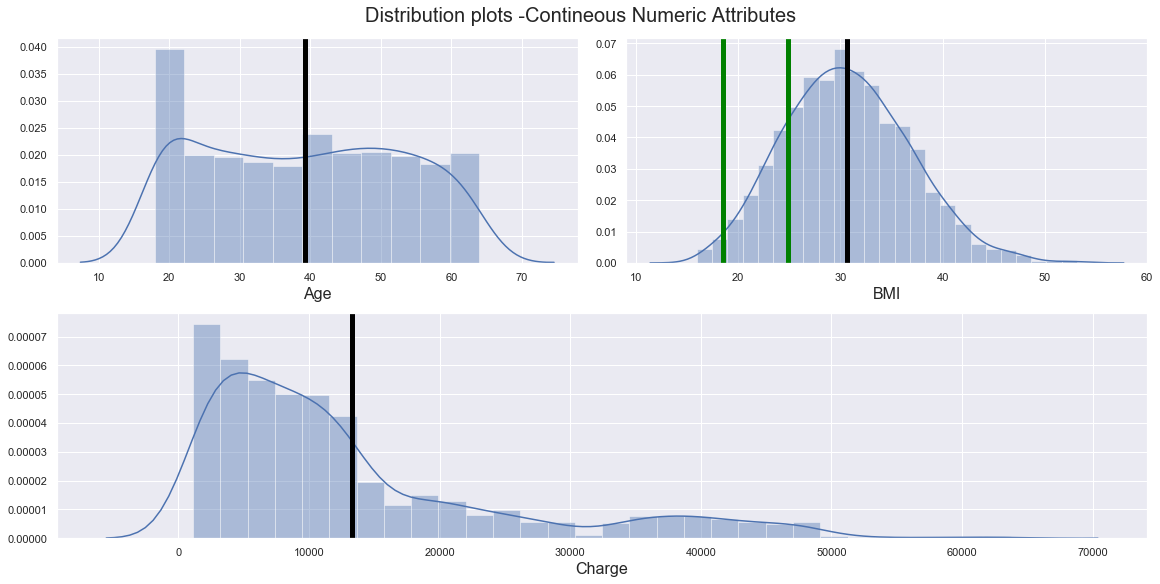

In [10]:
sns.set()
fig =plt.figure(constrained_layout=True,figsize=(16,8)) # Distribution plot for numeric variables
gs = fig.add_gridspec(2, 2)
fig_ax1=fig.add_subplot(gs[0,0])
fig_ax2=fig.add_subplot(gs[0,1])
fig_ax3=fig.add_subplot(gs[1,:])
sns.distplot(data_df['age'],ax=fig_ax1)
fig_ax1.set_xlabel('Age',fontsize=16)
sns.distplot(data_df['bmi'],ax=fig_ax2)
fig_ax2.set_xlabel('BMI',fontsize=16)
sns.distplot(data_df['charges'],ax=fig_ax3)
fig_ax3.set_xlabel('Charge',fontsize=16)
fig_ax1.axvline(x=data_df['age'].mean(),linewidth=5,color='black')
fig_ax2.axvline(x=data_df['bmi'].mean(),linewidth=5,color='black')
fig_ax2.axvline(x=18.5,linewidth=5,color='green')
fig_ax2.axvline(x=24.9,linewidth=5,color='green')
fig_ax3.axvline(x=data_df['charges'].mean(),linewidth=5,color='black')
fig.suptitle('Distribution plots -Contineous Numeric Attributes',fontsize=20)

## Inference based on Distribution of Contineous Numeric Attributes
* Age : People across ages(18-64 years) are equally likely to take insurance due to flat distribution observed
* bmi : Bmi is normally distributed,however the mean value(black line) is higher than the ideal band indicated by the green band.This indicates the majority of people(80%) taking insurance are  over weigth and are at greater risk of health issues.
* Charge : Rigth tailed distributed indicating the majority of the issurance cost is paid to smaller percentage of population (50 % of cost paid to 30% of population as infered from the 5 point summary and box plot analysis analysis).

Skewness of Numeric attributes
age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64


Text(0.5, 1.0, 'Skewness of Numeric attributes')

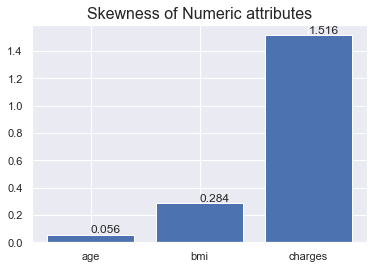

In [11]:
col_num=data_df.columns[data_df.dtypes!='category']
print('Skewness of Numeric attributes')
print(data_df[col_num].skew())
barplot=plt.bar(col_num,list(data_df[col_num].skew()))
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,'%0.3f'%(yval), va='bottom')
    #va: vertical alignment y positional argument
plt.title('Skewness of Numeric attributes',fontsize=16)

## Inference based on Skewness value of Numeric attributes
* Skewness value indicates  asymmetry of the attribute distribution about its means.
* As observed in the distribution analysis and 5 point summary , the age is the least skewed about its mean, followed by bmi (skewness values close to 0). Charges is highly skewed positively (rigth tailed) as the mean is significant > median.


Text(0.5, 0.98, 'Box Plots (5 point summary) -Contineous Numeric Attributes')

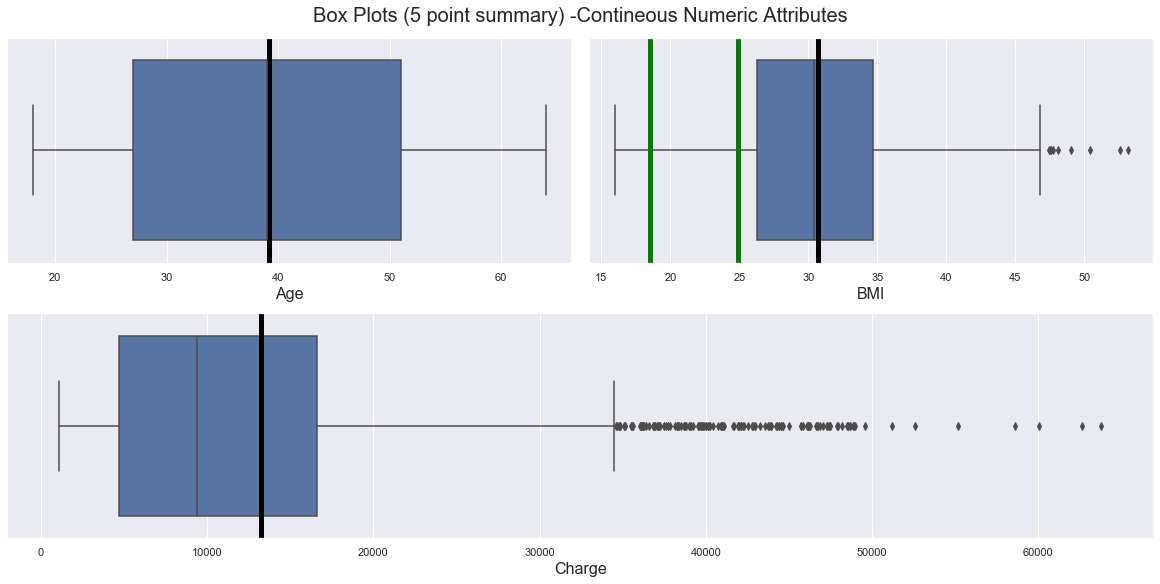

In [12]:
fig =plt.figure(constrained_layout=True,figsize=(16,8)) 
gs = fig.add_gridspec(2, 2)
fig_ax1=fig.add_subplot(gs[0,0])
fig_ax2=fig.add_subplot(gs[0,1])
fig_ax3=fig.add_subplot(gs[1,:])
sns.boxplot(data_df['age'],ax=fig_ax1)
fig_ax1.set_xlabel('Age',fontsize=16)
sns.boxplot(data_df['bmi'],ax=fig_ax2)
fig_ax2.set_xlabel('BMI',fontsize=16)
sns.boxplot(data_df['charges'],ax=fig_ax3)
fig_ax3.set_xlabel('Charge',fontsize=16)
fig_ax1.axvline(x=data_df['age'].mean(),linewidth=5,color='black')
fig_ax2.axvline(x=data_df['bmi'].mean(),linewidth=5,color='black')
fig_ax2.axvline(x=18.5,linewidth=5,color='green')
fig_ax2.axvline(x=24.9,linewidth=5,color='green')
fig_ax3.axvline(x=data_df['charges'].mean(),linewidth=5,color='black')

fig.suptitle('Box Plots (5 point summary) -Contineous Numeric Attributes',fontsize=20)

## Outlier detection based on range method 
* Age : There is no presence of outlier 
* BMI : Ther are certain recorded which are potential outliers (data point after the right whisker) 
* Charge : There many records which are potential outliers (data point after the right whisker)



------Descriptive stats Summary------

         count unique        top  freq
sex       1338      2       male   676
children  1338      6          0   574
smoker    1338      2         no  1064
region    1338      4  southeast   364


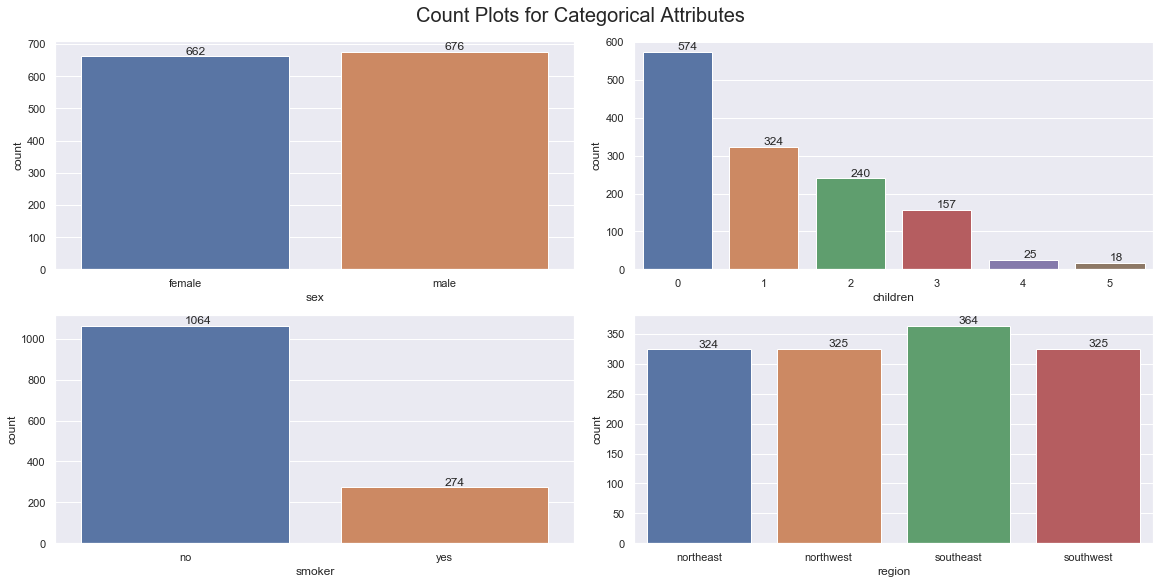

In [13]:
print('------Descriptive stats Summary------\n')
print(data_df.describe(include='category').T)
col_cat=data_df.columns[data_df.dtypes=='category'] # store categorical variable names
fig =plt.figure(constrained_layout=True,figsize=(16,8)) # Distribution plot for numeric variables
gs=fig.add_gridspec(2,2)
fig_ax1=fig.add_subplot(gs[0,0])
fig_ax2=fig.add_subplot(gs[0,1])
fig_ax3=fig.add_subplot(gs[1,0])
fig_ax4=fig.add_subplot(gs[1,1])
barplot=sns.countplot(data_df[col_cat[0]].sort_values(),ax=fig_ax1)
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate('%0.0f'%(yval),(bar.get_x() + bar.get_width()/2.0,yval), va='bottom') 
barplot=sns.countplot(data_df[col_cat[1]].sort_values(),ax=fig_ax2)
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate('%0.0f'%(yval),(bar.get_x() + bar.get_width()/2.0,yval), va='bottom') 
barplot=sns.countplot(data_df[col_cat[2]].sort_values(),ax=fig_ax3)
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate('%0.0f'%(yval),(bar.get_x() + bar.get_width()/2.0,yval), va='bottom') 
barplot=sns.countplot(data_df[col_cat[3]].sort_values(),ax=fig_ax4)
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate('%0.0f'%(yval),(bar.get_x() + bar.get_width()/2.0,yval), va='bottom') 
    fig.suptitle('Count Plots for Categorical Attributes',fontsize=20)

## Inference based Categorical variable distribution
* Sex : Males and Female are almost equally represented as primary benificiary.
* Children : Number children /dependent covered by healt insurance per primary benificiay reduces exponentially as expected.
* Smoker : Data is biased towards non smoker (~4:1)
* Region : People from all the regions are equally represented in the data

## Bivaritae Analysis


In [14]:
#Label encoding for pair plot
from sklearn.preprocessing import LabelEncoder 
df=data_df.copy()  # make a copy
lb_make = LabelEncoder() # assign 
df["sex"]=lb_make.fit_transform(df["sex"]) #fit and transform sex column
df["region"]=lb_make.fit_transform(df["region"]) #fit and transform region column
df["smoker"]=lb_make.fit_transform(df["smoker"]) # fit and transform smoker colum
df["children"]=lb_make.fit_transform(df["children"]) # fit and transform smoker colum
df.head() # check for label transformation

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


* Categorical variables are label encoded

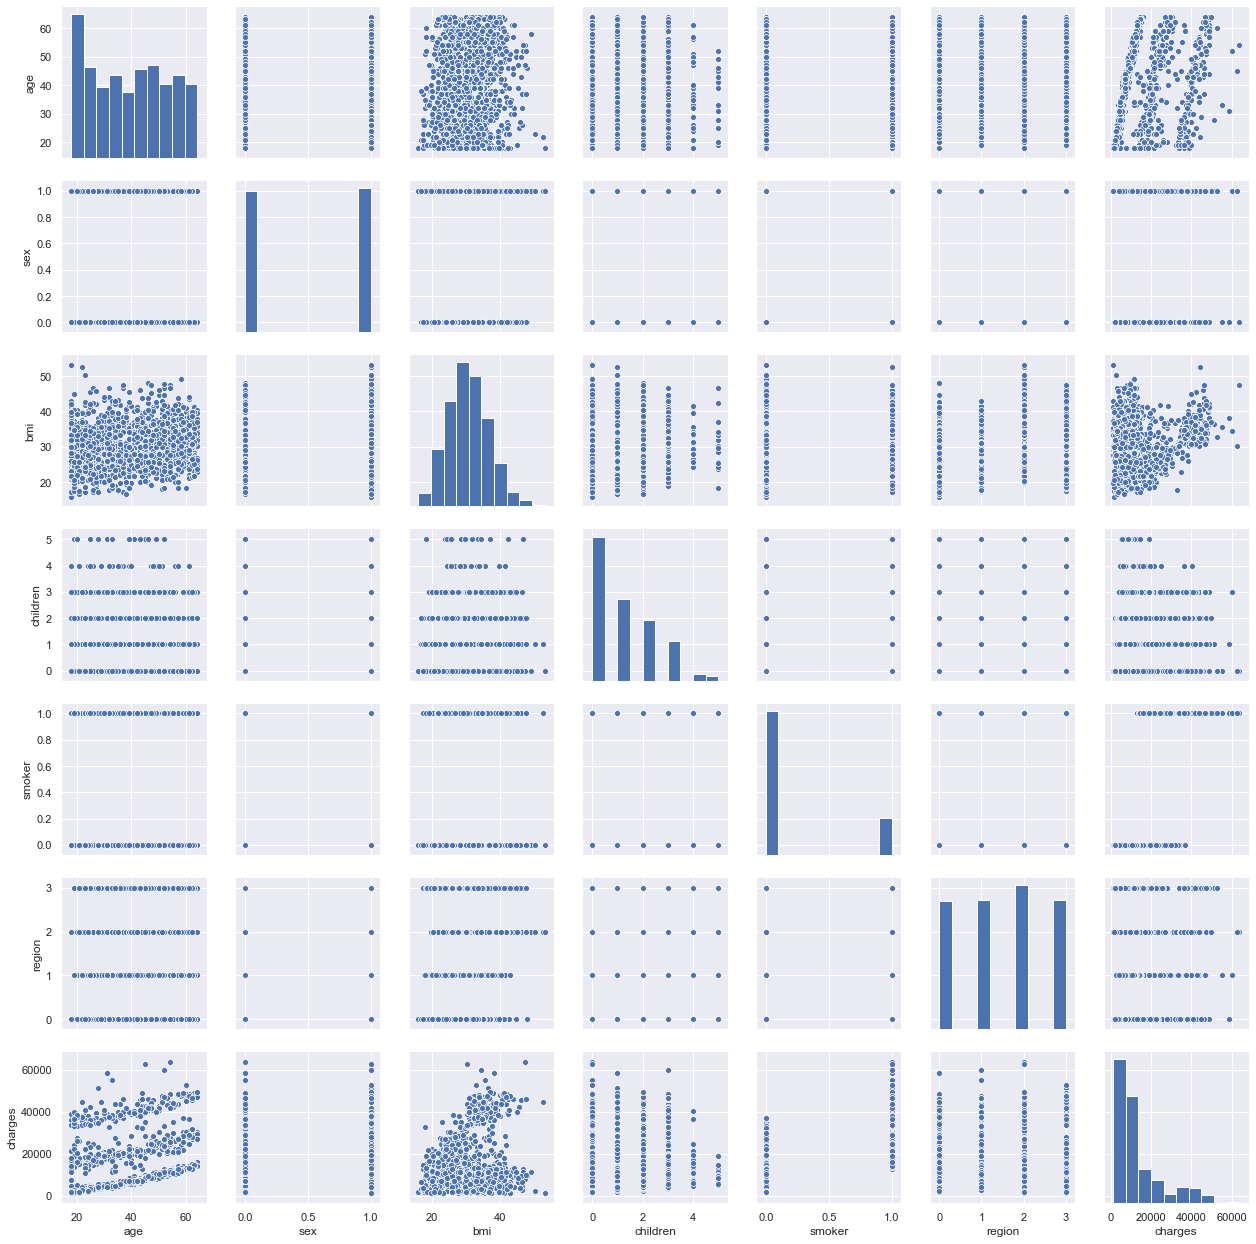

In [15]:
sns.pairplot(df) # pairplot with all columns

## Inference from Pairplots
* Individual medical cost (charges) is strongly corelated with smoker type. Median of Non smoker ('0') is lower than smoker ('1'). 
* Individual medical cost (charges) increase with age and there seem to 3 different plans applicable

Text(0.5, 1, 'Corelation matrix Heatmap')

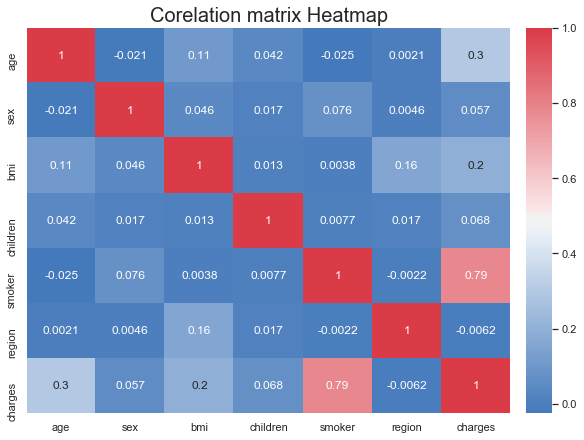

In [16]:
fig =plt.figure(constrained_layout=True,figsize=(8,6))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap = cmap, annot = True)
plt.title('Corelation matrix Heatmap',fontsize=20)

## Strong  positive corelation :
* Individual medical cost vs Smoker type (0.787)

## Weak corelation :
* Individual medical cost(charges) vs Age (0.299)
* Individual medical cost (chages) vs BMI (0.198)
* BMI vs region (0.157)
* BMI vs age (0.109)

# Inferential statistical Analysis

## Q1) Do charges of people who smoke differ significantly  from the people who don't? 

Mean Charges for smokers     : 32050
Mean Charges for non smokers : 8434
Std Dev Charges for smokers     : 11542
Std Dev Charges for non smokers : 5994


Text(0.5, 0.98, 'Distrution lot of Charges')

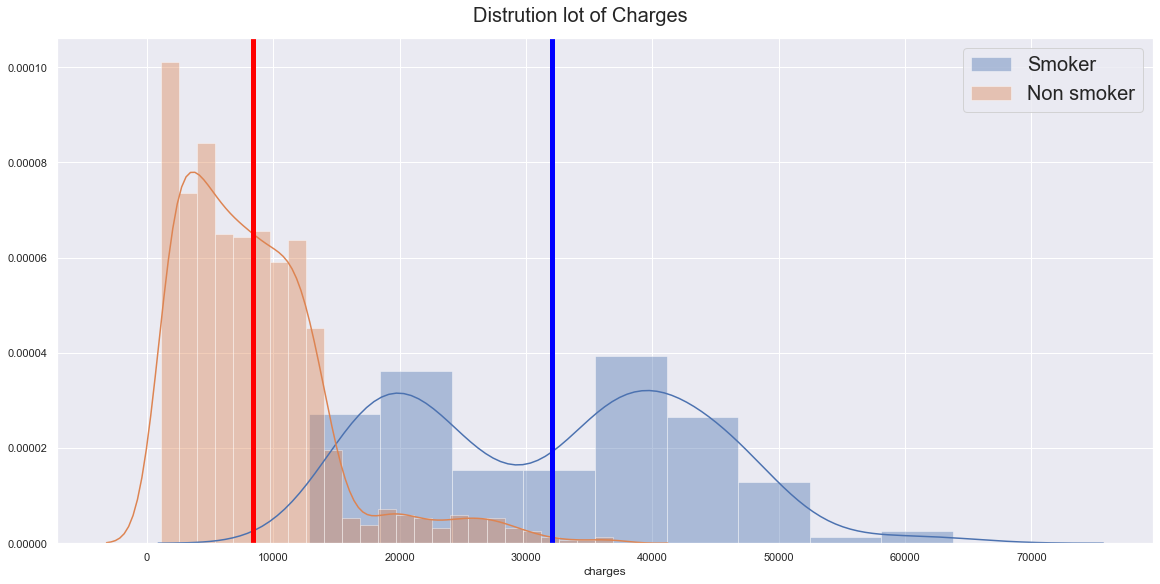

In [17]:
fig =plt.figure(constrained_layout=True,figsize=(16,8)) # Distribution plot for numeric variables
gs=fig.add_gridspec(1,1)
fig_ax1=fig.add_subplot(gs[0,0])
sns.distplot(data_df[data_df['smoker']=='yes']['charges'],ax=fig_ax1,label='Smoker')
sns.distplot(data_df[data_df['smoker']=='no']['charges'],ax=fig_ax1,label='Non smoker')
plt.axvline((data_df[data_df['smoker']=='yes']['charges'].mean()),0,1,linewidth=5,color='blue')
plt.axvline((data_df[data_df['smoker']=='no']['charges'].mean()),0,1,linewidth=5,color='red')
print('Mean Charges for smokers     : %0.0f'%(data_df[data_df['smoker']=='yes']['charges'].mean()))
print('Mean Charges for non smokers : %0.0f'%(data_df[data_df['smoker']=='no']['charges'].mean()))
print('Std Dev Charges for smokers     : %0.0f'%(data_df[data_df['smoker']=='yes']['charges'].std()))
print('Std Dev Charges for non smokers : %0.0f'%(data_df[data_df['smoker']=='no']['charges'].std()))
plt.legend(fontsize=20)
fig.suptitle('Distrution lot of Charges',fontsize=20)

* The individual medical cost (charges) for smoker looks significantly higher than non smoker (refer above distribution plot)
* we shall use hypothesis test to statistically validate the inisight.

## Step 1 :Define Null and Alternate hypothesis

* $H_0$ : $\mu$ (smoker) = $\mu$ (Non smoker) 
* $H_A$ : $\mu$ (smoker)!=$\mu$ (Non smoker)

## Step 2 : Decide the Significance level
We select aplha =0.05 population standard deviation is not known

## Step 3 : Indentify the test statistic
We have two samples and we donot know the population standard deviation and sample size are unequal. so we shall use the 2 sample independent t test with t test statistic.

## Step 4: Verify the assumption for 2 sample t test.
* Variance of the two population are same - Levene's test
* Sample means should follow a normal distribution- For a large sample as in this case , the assumption is satisfied by central limit theorom.

In [18]:
smoker=data_df[data_df['smoker']=='yes']['charges'] # assign sample 1 population to smokers
non_smoker=data_df[data_df['smoker']=='no']['charges'] # assign sample 2 populaiton to non smokers

In [19]:
test_statistic, p_value=stats.levene(smoker,non_smoker) # equal variance check
print ('Levene test results  for equal variance\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))

Levene test results  for equal variance
Test Statistic : 332.614
p_value : 0.000


The P values is less than 5% level of significance. so the statistical decision is to reject the null hypothessis  at 5% level of significance .There is sufficient evidence to prove that the population being compared doesnot have equal variance. 
We shall conduct the test Welch t test which is insensitive to unequal variance and sample size.

## Step 5 : Calculate p-Value and test statistic

In [20]:
test_statistic, p_value=stats.ttest_ind(smoker,non_smoker,equal_var=False) # independent 2 sample test
print ('2 Independent sample Welch t test results\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))

2 Independent sample Welch t test results
Test Statistic : 32.752
p_value : 0.000


## Step 6 : Decide to accept or reject null hypothesis

The P values is less than 5% level of significance. so the statistical decision is to reject the null hypothessis  at 5% level of significance .

## There is sufficient evidence to prove that charges of people who smoke differ significantly  from the people who don't

## Q2)  Does bmi of males differ significantly from that of  females?  

Mean BMI for Male     : 31
Mean BMI for non female : 30
Std Dev BMI for Male     : 6
Std Dev BMI for non female : 6


Text(0.5, 0.98, 'Distribution plot of  BMI ')

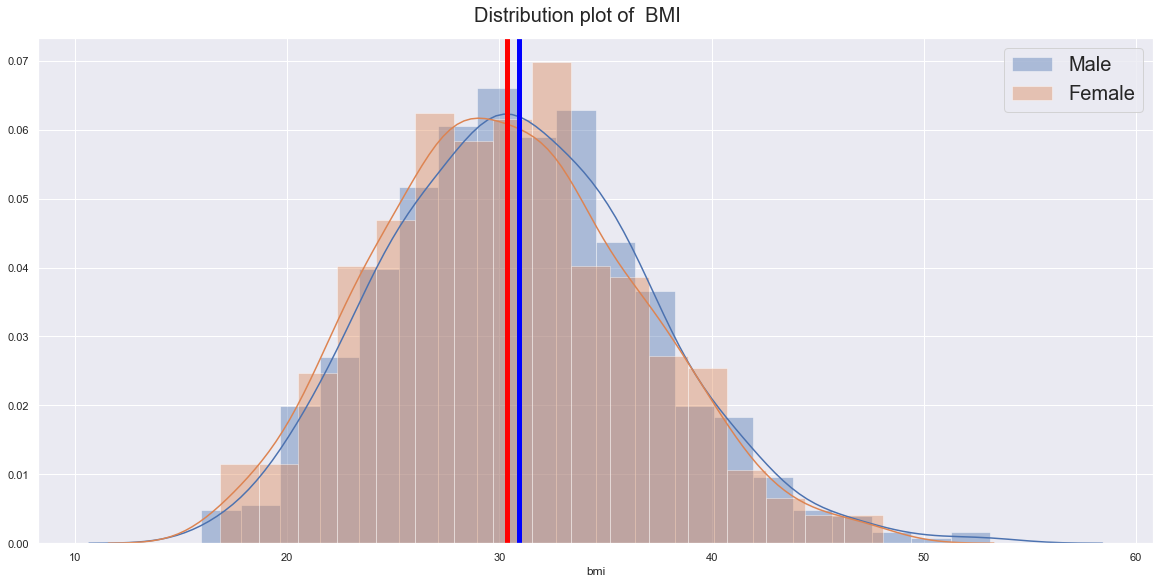

In [21]:
fig =plt.figure(constrained_layout=True,figsize=(16,8)) # Distribution plot for numeric variables
gs=fig.add_gridspec(1,1)
fig_ax1=fig.add_subplot(gs[0,0])
sns.distplot(data_df[data_df['sex']=='male']['bmi'],ax=fig_ax1,label='Male')
sns.distplot(data_df[data_df['sex']=='female']['bmi'],ax=fig_ax1,label='Female')
plt.axvline((data_df[data_df['sex']=='male']['bmi'].mean()),0,1,linewidth=5,color='blue')
plt.axvline((data_df[data_df['sex']=='female']['bmi'].mean()),0,1,linewidth=5,color='red')
print('Mean BMI for Male     : %0.0f'%(data_df[data_df['sex']=='male']['bmi'].mean()))
print('Mean BMI for non female : %0.0f'%(data_df[data_df['sex']=='female']['bmi'].mean()))
print('Std Dev BMI for Male     : %0.0f'%(data_df[data_df['sex']=='male']['bmi'].std()))
print('Std Dev BMI for non female : %0.0f'%(data_df[data_df['sex']=='female']['bmi'].std()))
plt.legend(fontsize=20)
fig.suptitle('Distribution plot of  BMI ',fontsize=20)

* BMI of Male and Female are almost identically distributed and with almost identical mean(refer above distribution plot)
* we shall use hypothesis test to statistically validate the inisight.

## Step 1 :Define Null and Alternate hypothesis

* $H_0$ : $\mu$ (bmi_male) = $\mu$ (bmi_female) 
* $H_A$ : $\mu$ (bmi_male)!=$\mu$ (bmi_female)

## Step 2 : Decide the Significance level
We select aplha =0.05 population standard deviation is not known

## Step 3 : Indentify the test statistic
We have two samples and we donot know the population standard deviation and sample size are almost identical (FEmale :662 Male 676). so we shall use the 2 sample independent t test with t test statistic.

## Step 4: Verify the assumption for 2 sample t test.
* Variance of the two population are same - Levene's test
* Sample means should follow a normal distribution- For a large sample as in this case , the assumption is satisfied by central limit theorom.

In [22]:
bmi_male=data_df[data_df['sex']=='male']['bmi'] # assign sample 1 population to male
bmi_female=data_df[data_df['sex']=='female']['bmi'] # assign sample 2 populaiton to female

In [23]:
test_statistic, p_value=stats.levene(bmi_male,bmi_female) # equal variance check
print ('Levene test results  for equal variance\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))

Levene test results  for equal variance
Test Statistic : 0.004
p_value : 0.950


The P values is greater than 5% level of significance. so the statistical decision is not to reject the null hypothessis  at 5% level of significance .There is sufficient statistical evidence to prove that the population being compared have equal variance. 
We shall conduct 2 sample t test independent

## Step 5 : Calculate p-Value and test statistic

In [24]:
test_statistic, p_value=stats.ttest_ind(bmi_male,bmi_female,equal_var=True) # independent 2 sample test
print ('2 Independent sample t test results\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))

2 Independent sample t test results
Test Statistic : 1.697
p_value : 0.090


## Step 6 : Decide to accept or reject null hypothesis

The P values is greater than 5% level of significance. so the statistical decision is not to reject the null hypothessis  at 5% level of significance .

## There is sufficient statistical evidence to prove that bmi of males doesnot differ significantly from that of  females

## Q3)Is the proportion of smokers significantly different  in different genders? 

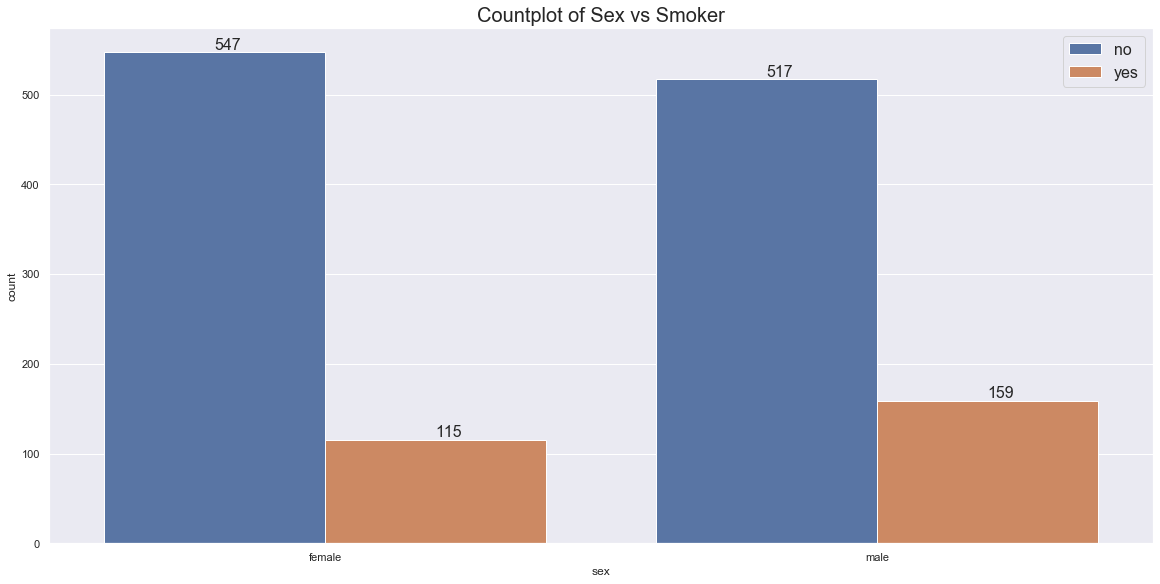

In [25]:
fig =plt.figure(constrained_layout=True,figsize=(16,8)) # Distribution plot for numeric variables
barplot=sns.countplot(data_df['sex'],hue='smoker',data=data_df)
plt.title('Countplot of Sex vs Smoker',fontsize=20)
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.annotate('%0.0f'%(yval),(bar.get_x() + bar.get_width()/2.0,yval), va='bottom',fontsize=16) 
plt.legend(fontsize=16)

* Proportion of smoker is higer(30%) in male as compared to female (21%) (refer above count plot)
* we shall use hypothesis test to statistically validate the inisight.

## Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: Proportion of smokers is same  in different genders
                        
Alternative hypothesis: $H_A$: Proportion of smokers is significantly different  in different genders

## Step 2: Decide the significance level

Here we select α = 0.05

## Step 3: Identify the test statistic

Since we have observed frequencies of smoker and non smoker in different gender and we can calculate the expected frequencies, we can use chi-square goodness of fit for this problem.

## Step 4: Calculate p value and chi-square statistic value

observed Frequency table
         non smoker  smoker
male           517     159
female         547     115


Text(0.5, 1, 'Observed frequency Table')

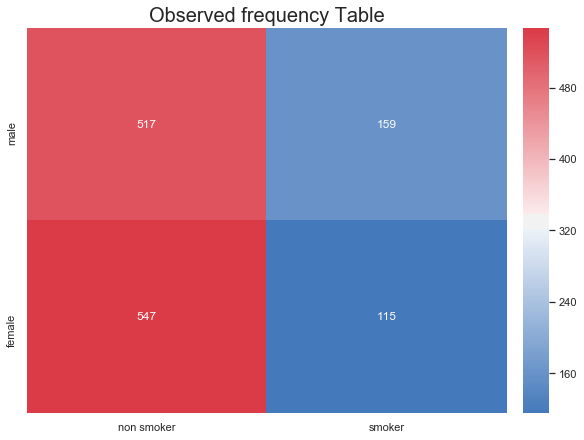

In [26]:
male_freq= data_df[data_df['sex']=='male']['smoker'].value_counts() # observed frequency in male
female_freq= data_df[data_df['sex']=='female']['smoker'].value_counts() # observed frequency in female
observed_frequency_table=pd.concat([male_freq,female_freq],axis=1,) # concat the values
observed_frequency_table=pd.DataFrame(np.array(observed_frequency_table),columns=['male','female'],index=['non smoker','smoker'])
print('observed Frequency table\n',observed_frequency_table.T) # print data frame 
# heat map for contingency table
fig =plt.figure(constrained_layout=True,figsize=(8,6))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(observed_frequency_table.T,annot=True,cmap=cmap,fmt='0.0f')
plt.title ('Observed frequency Table',fontsize=20)

Chi-square statistic : 7.39 

P value              : 0.007



Text(0.5, 1, 'Expected Frequency Table')

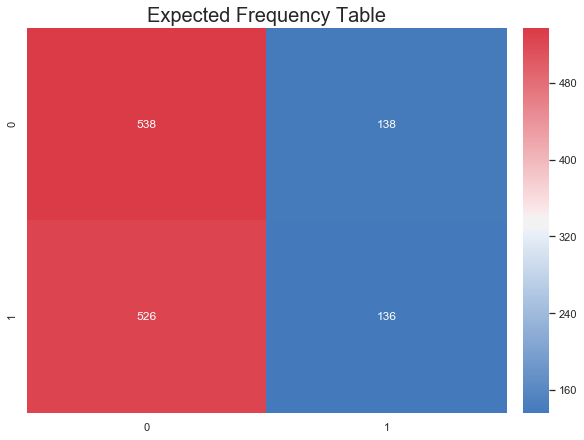

In [27]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(observed_frequency_table.T)
print('Chi-square statistic : %1.2f \n' %(chi_sq_Stat))
print('P value              : %1.3f\n' %( p_value))
fig =plt.figure(constrained_layout=True,figsize=(8,6))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(exp_freq,annot=True,cmap=cmap,fmt='0.0f')
plt.title ('Expected Frequency Table',fontsize=20)

## Step 5 : Decide to accept or reject null hypothesis

* P value is less than 0.05.Statistically significanct evidence is available to reject null hypothesis at 5% level of significance

### There is sufficient statistical evidence to prove that the proportion of smokers  significantly differ  in different genders

## Q4)  Is the distribution of bmi across women with no  children, one child and two children, the same ?

Mean BMI for Female with 0 Child        : 30.36
Mean BMI for Female with 1 Child        : 30.05
Mean BMI for Female with 2 Child        : 30.65
Std Dev BMI for Female with 0 Child     : 5.97
Std Dev BMI for Female with 1 Child     : 5.79
Std Dev BMI for Female with 2 Child     : 6.63


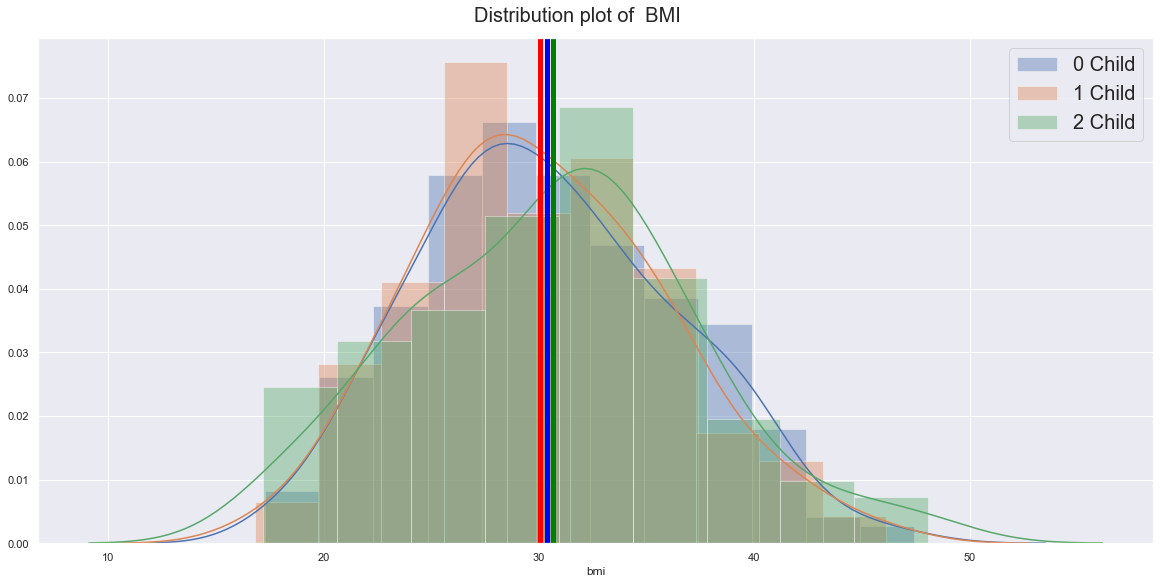

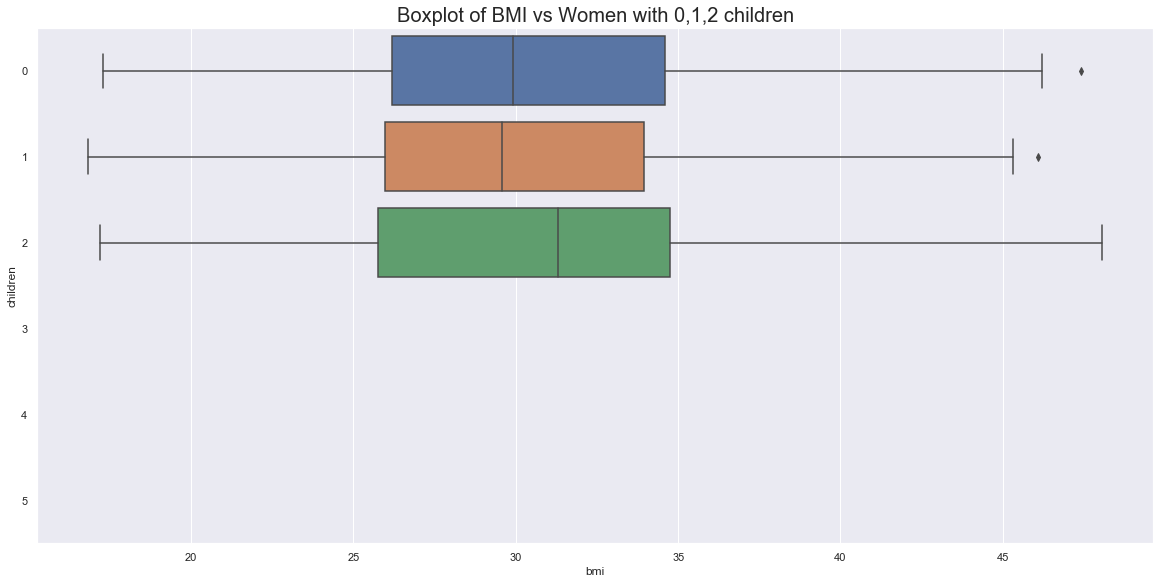

In [28]:
fig =plt.figure(constrained_layout=True,figsize=(16,8)) 
gs=fig.add_gridspec(1,1)
fig_ax1=fig.add_subplot(gs[0,0])
sns.distplot(data_df[(data_df['children']==0)&(data_df['sex']=='female')]['bmi'],ax=fig_ax1,label='0 Child')
sns.distplot(data_df[(data_df['children']==1)&(data_df['sex']=='female')]['bmi'],ax=fig_ax1,label='1 Child')
sns.distplot(data_df[(data_df['children']==2)&(data_df['sex']=='female')]['bmi'],ax=fig_ax1,label='2 Child')
plt.axvline(data_df[(data_df['children']==0)&(data_df['sex']=='female')]['bmi'].mean(),0,1,linewidth=5,color='blue')
plt.axvline(data_df[(data_df['children']==1)&(data_df['sex']=='female')]['bmi'].mean(),0,1,linewidth=5,color='red')
plt.axvline(data_df[(data_df['children']==2)&(data_df['sex']=='female')]['bmi'].mean(),0,1,linewidth=5,color='green')
print('Mean BMI for Female with 0 Child        : %0.2f'%(data_df[(data_df['children']==0)&(data_df['sex']=='female')]['bmi'].mean()))
print('Mean BMI for Female with 1 Child        : %0.2f'%(data_df[(data_df['children']==1)&(data_df['sex']=='female')]['bmi'].mean()))
print('Mean BMI for Female with 2 Child        : %0.2f'%(data_df[(data_df['children']==2)&(data_df['sex']=='female')]['bmi'].mean()))
print('Std Dev BMI for Female with 0 Child     : %0.2f'%(data_df[(data_df['children']==0)&(data_df['sex']=='female')]['bmi'].std()))
print('Std Dev BMI for Female with 1 Child     : %0.2f'%(data_df[(data_df['children']==1)&(data_df['sex']=='female')]['bmi'].std()))
print('Std Dev BMI for Female with 2 Child     : %0.2f'%(data_df[(data_df['children']==2)&(data_df['sex']=='female')]['bmi'].std()))
plt.legend(fontsize=20)
fig.suptitle('Distribution plot of  BMI ',fontsize=20)
fig =plt.figure(constrained_layout=True,figsize=(16,8)) 
data_temp=data_df[(data_df['children'].isin([0,1,2]))&(data_df['sex']=='female')]
sns.boxplot(x='bmi',y='children',data=data_temp)
plt.title('Boxplot of BMI vs Women with 0,1,2 children',fontsize=20)
plt.show()

* BMI distribution of Female with0,1,2 chidlren doesnot look significantly different .(refer above distribution and box plot plot)
* we shall use hypothesis test to statistically validate the inisight.


### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu(0 child)$ = $\mu(1 child)$ = $\mu(2 child)$
* $H_A$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

## Step 4: Verify the assumption for ANNOVA
* Variance of the two population are same - Levene's test
* Sample came from a normal population - Shapiro's test

* Levene's test 

In [29]:
e1=data_df[(data_df['children']==0)&(data_df['sex']=='female')]['bmi']
e2=data_df[(data_df['children']==1)&(data_df['sex']=='female')]['bmi']
e3=data_df[(data_df['children']==2)&(data_df['sex']=='female')]['bmi']

In [30]:
test_statistic, p_value=stats.levene(e1,e2,e3) # equal variance check
print ('Levene test results  for equal variance\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))

Levene test results  for equal variance
Test Statistic : 0.943
p_value : 0.390


* The P values is greater than 5% level of significance. so the statistical decision is not to reject the null hypothessis  at 5% level of significance .There is sufficient statistical evidence to prove that the population being compared have equal variance. 

In [31]:
test_statistic, p_value=stats.shapiro(e1)
print ('Shapiro test results  for normality for bmi distributio of women with no children\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))
test_statistic, p_value=stats.shapiro(e2)
print ('Shapiro test results  for normality for bmi distributio of women with 1 children\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))
test_statistic, p_value=stats.shapiro(e3)
print ('Shapiro test results  for normality for bmi distributio of women with 2 children\nTest Statistic : %0.3f\np_value : %0.3f'%(test_statistic, p_value))

Shapiro test results  for normality for bmi distributio of women with no children
Test Statistic : 0.990
p_value : 0.038
Shapiro test results  for normality for bmi distributio of women with 1 children
Test Statistic : 0.992
p_value : 0.536
Shapiro test results  for normality for bmi distributio of women with 2 children
Test Statistic : 0.986
p_value : 0.260


* The condition of normality is mariginally violated for a 5% level of significance by distribution of bmi of women with no children ,however we shall go ahead assuming a near normal distrubution which is quite evident from the above distribution plot of a large enough sample size.

### Step 4: Calculate F, a test statistic and p VAlue

In [32]:
F_stats,P_value=stats.f_oneway(e1,e2,e3)
print('F_stat :%5.3f\nP_value : %5.3f'%(F_stats,P_value))

F_stat :0.334
P_value : 0.716


### Step 5:  Decide to reject or accept null hypothesis

* P value > 0.05.Statistically significanct evidence is available not to reject null hypothesis at 5% level of significance

## There is sufficient statistical evidence to prove that the means of  3 populaitons are equal.The distribution of bmi across women with no  children, one child and two children are the same.